# Class Imbalance and redressal Method

#class imbalance => one class has higher percwntage than other

**Upsampling, downsampling and SMOTE**

In [1]:
import numpy as np
import pandas as pd
np.random.seed(1) #for reproducibility

In [2]:
sample1=1000
class_0_ratio = 0.9
no_class_0=int(sample1*class_0_ratio)
no_class_1 =100

In [3]:
class_0_ratio

0.9

In [4]:
no_class_0

900

In [5]:
no_class_1

100

In [6]:
np.random.normal(0,1,no_class_0)

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

In [7]:
len(np.random.normal(0,1,no_class_0))

900

In [9]:
class_0={"feature1":np.random.normal(0,1,no_class_0),
 'feature2':np.random.normal(0,1,no_class_0),
 'target':[0]*no_class_0}

In [11]:
class_0 =pd.DataFrame(class_0)

In [12]:
class_0

,feature1,feature2,target
0,-0.098819,-0.551358,0
1,-0.270149,-0.604188,0
2,1.745068,1.234969,0
3,-0.180558,-0.103111,0
4,-0.202378,-0.368854,0
...,...,...,...
895,0.747622,-2.094381,0
896,0.943634,-0.385521,0
897,-0.425562,-1.408973,0
898,0.805778,0.076441,0


In [15]:
class_1=pd.DataFrame({"feature1":np.random.normal(3,1,no_class_1),
 'feature2':np.random.normal(3,1,no_class_1),
 'target':[1]*no_class_1})

In [16]:
class_1

,feature1,feature2,target
0,3.634025,3.978003,1
1,3.713001,2.848891,1
2,2.516681,3.091870,1
3,1.077849,3.039246,1
4,2.238663,4.542756,1
...,...,...,...
95,5.081696,2.568403,1
96,2.937800,2.669091,1
97,4.581080,2.336346,1
98,2.836307,1.568747,1


In [19]:
df=pd.concat([class_0,class_1]).reset_index(drop = True)

In [22]:
df.target.value_counts(normalize=True)

,proportion
target,
0,0.9
1,0.1


In [23]:
df

,feature1,feature2,target
0,-0.098819,-0.551358,0
1,-0.270149,-0.604188,0
2,1.745068,1.234969,0
3,-0.180558,-0.103111,0
4,-0.202378,-0.368854,0
...,...,...,...
995,5.081696,2.568403,1
996,2.937800,2.669091,1
997,4.581080,2.336346,1
998,2.836307,1.568747,1


In [24]:
#seperate the data into minority and majority class

df_minority = df[df.target==1]
df_majority = df[df.target==0]

In [25]:
df_minority

,feature1,feature2,target
900,3.634025,3.978003,1
901,3.713001,2.848891,1
902,2.516681,3.091870,1
903,1.077849,3.039246,1
904,2.238663,4.542756,1
...,...,...,...
995,5.081696,2.568403,1
996,2.937800,2.669091,1
997,4.581080,2.336346,1
998,2.836307,1.568747,1


In [26]:
df_majority

,feature1,feature2,target
0,-0.098819,-0.551358,0
1,-0.270149,-0.604188,0
2,1.745068,1.234969,0
3,-0.180558,-0.103111,0
4,-0.202378,-0.368854,0
...,...,...,...
895,0.747622,-2.094381,0
896,0.943634,-0.385521,0
897,-0.425562,-1.408973,0
898,0.805778,0.076441,0


**Up sampling**=> incresing the minority data to majority data

In [27]:
#oversampling>> upsampling>> incresing minority to majority no
from sklearn.utils import resample

In [31]:
df_minority_upsample=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=1)

In [32]:
df_minority_upsample.shape

(900, 3)

In [36]:
df_minority_upsample.duplicated().sum()

800

In [37]:
pd.concat([df_minority_upsample,df_majority])

,feature1,feature2,target
937,3.963283,3.258716,1
912,2.294998,3.830049,1
972,2.213914,2.686358,1
909,3.966975,3.487457,1
975,2.956591,3.903112,1
...,...,...,...
895,0.747622,-2.094381,0
896,0.943634,-0.385521,0
897,-0.425562,-1.408973,0
898,0.805778,0.076441,0


In [41]:
df_upsampled=pd.concat([df_minority_upsample,df_majority])

In [42]:
df_upsampled.shape

(1800, 3)

In [43]:
df_upsampled.target.value_counts()

,count
target,
1,900
0,900


**downsampling**

In [44]:
df_majority

,feature1,feature2,target
0,-0.098819,-0.551358,0
1,-0.270149,-0.604188,0
2,1.745068,1.234969,0
3,-0.180558,-0.103111,0
4,-0.202378,-0.368854,0
...,...,...,...
895,0.747622,-2.094381,0
896,0.943634,-0.385521,0
897,-0.425562,-1.408973,0
898,0.805778,0.076441,0


In [52]:
df_majority_downsample = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=1)

In [53]:
df_majority

,feature1,feature2,target
0,-0.098819,-0.551358,0
1,-0.270149,-0.604188,0
2,1.745068,1.234969,0
3,-0.180558,-0.103111,0
4,-0.202378,-0.368854,0
...,...,...,...
895,0.747622,-2.094381,0
896,0.943634,-0.385521,0
897,-0.425562,-1.408973,0
898,0.805778,0.076441,0


In [54]:
df_downsampled= pd.concat([df_majority_downsample,df_minority])

In [55]:
df_downsampled

,feature1,feature2,target
860,0.780678,0.648790,0
880,0.215341,1.161142,0
874,-0.603646,-0.374507,0
780,0.363966,-1.178784,0
525,0.992134,0.629625,0
...,...,...,...
995,5.081696,2.568403,1
996,2.937800,2.669091,1
997,4.581080,2.336346,1
998,2.836307,1.568747,1


In [56]:
df_downsampled.target.value_counts()

,count
target,
0,100
1,100


**SMOTE**>> synthetic minority oversampling technique

In [58]:
from sklearn.datasets import make_classification

In [59]:
make_classification

<function sklearn.datasets._samples_generator.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)>

In [62]:
x,y=make_classification(n_samples= 1000 ,n_redundant =0, n_features=2, n_clusters_per_class=1, weights=[0.90],random_state =1)

In [63]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [64]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [65]:
len(y[y==0])

894

In [66]:
df1 = pd.DataFrame(x,columns=['f1','f2'] )
df2 = pd.DataFrame(y,columns=['target'])

In [69]:
df_final = pd.concat([df1,df2],axis=1)

In [71]:
df_final.target.value_counts()

,count
target,
0,894
1,106


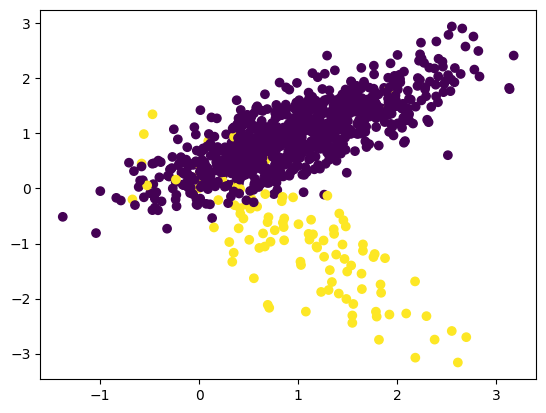

In [72]:
import matplotlib.pyplot as plt
plt.scatter(df_final['f1'],df_final['f2'],c=df_final['target'])
plt.show()

In [76]:
!pip install imblearn

In [78]:
from imblearn.over_sampling import SMOTE

In [79]:
oversample =SMOTE()

In [83]:
X,Y=oversample.fit_resample(df_final[['f1','f2']],df_final['target'])

In [84]:
X.shape

(1788, 2)

In [85]:
Y.shape

(1788,)

In [87]:
len(Y[Y==0])

894

In [88]:
len(Y[Y==1])

894

In [89]:
df1 = pd.DataFrame(X,columns=['f1','f2'] )
df2 = pd.DataFrame(Y,columns=['target'])
oversample = pd.concat([df1,df2],axis=1)

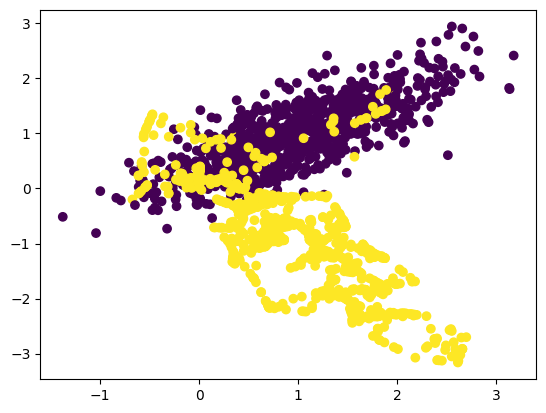

In [92]:
plt.scatter(oversample['f1'],oversample['f2'],c=oversample['target'])